In [79]:
from numpy.polynomial.polynomial import Polynomial
from operator import mul
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci
import pylab
from PIL import Image
from scipy.ndimage.interpolation import zoom, rotate

In [3]:
def lagrangeInterpolation(x, y):
    """
    Calculates the Lagrange interpolation polynomial for given set of interpolation nodes.
    """
    nodes = list(zip(x, y))
    n = len(nodes)
    
    polyFactor = lambda k, i : Polynomial(( (-x[i])/(x[k] - x[i]), 1/(x[k] - x[i]) ))
    
    result = Polynomial(0.)
    for k in range(n):
        
        factors = [polyFactor(k, i) for i in range(n) if i != k]
        result += reduce(mul, factors) * y[k]
        
    return result

In [4]:
def newtonInterpolation(x, y):
    """
    Calculates interpolation polynomial based on the Newton's divided differences method.
    """
    nodes = list(zip(x, y))
    n = len(nodes)
    
    result = Polynomial(y[0])
    basePoly = Polynomial(1.)
    
    diffs = [(y[k + 1] - y[k]) / (x[k + 1] - x[k]) for k in range(n - 1)]
    
    for i in range(1, n):
        basePoly *= Polynomial((-x[i - 1], 1))
        result += basePoly * diffs[0]
        
        diffs = [(diffs[k + 1] - diffs[k]) / (x[k + i + 1] - x[k]) for k in range(n - i - 1)]
        
    return result

In [5]:
a = lagrangeInterpolation((1, 2, 3), (1, 2, 1))
b = newtonInterpolation((1, 2, 3), (1, 2, 1))

In [6]:
print(a)
print(b)

poly([-2.  4. -1.])
poly([-2.  4. -1.])


In [7]:
b(1)

1.0

In [8]:
x = np.arange(1, 10)
y = np.random.rand(len(x))

In [9]:
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[0.79382811 0.96250473 0.68114741 0.85571864 0.55443063 0.59172825
 0.72002649 0.28522418 0.13164427]


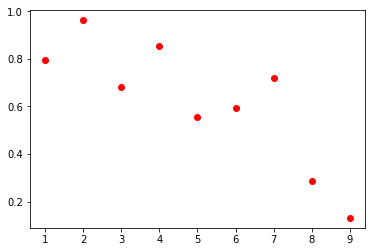

In [10]:
plt.plot(x, y, 'ro')

In [11]:
fit1 = newtonInterpolation(x, y)
fit2 = lagrangeInterpolation(x, y)
print(fit1.coef)
print(fit2.coef)
print(fit1.coef - fit2.coef)

[-3.44712165e+01  8.85385350e+01 -8.59915931e+01  4.33604115e+01
 -1.26315696e+01  2.20391406e+00 -2.27086739e-01  1.27326771e-02
 -2.99364368e-04]
[-3.44712165e+01  8.85385350e+01 -8.59915931e+01  4.33604115e+01
 -1.26315696e+01  2.20391406e+00 -2.27086739e-01  1.27326771e-02
 -2.99364368e-04]
[ 7.10542736e-15 -4.26325641e-14  0.00000000e+00 -6.39488462e-14
  0.00000000e+00  0.00000000e+00  1.11022302e-16  6.93889390e-18
  2.16840434e-19]


In [12]:
a = [1, 2, 3, 4, 5]
a[1:2] + a[3:4]

[2, 4]

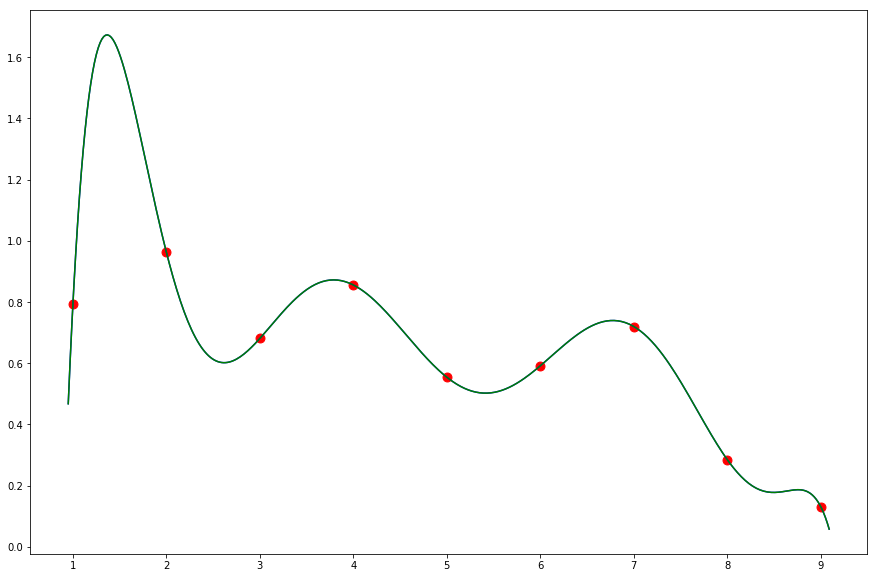

In [13]:
x2 = np.arange(0.95, 9.1, 0.02)

plt.figure(figsize=(15,10))
plt.scatter(x, y, s=80, c='r')
plt.plot(x2, fit1(x2), c='b')
plt.plot(x2, fit2(x2), c='g')

In [14]:
zero_spline = sci.interp1d(x, y, kind='zero')
linear_spline = sci.interp1d(x, y, kind='linear')
quadratic_spline = sci.interp1d(x, y, kind='quadratic')
cubic_spline = sci.interp1d(x, y, kind='cubic')

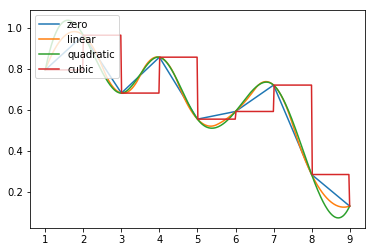

In [15]:
x3 = np.linspace(np.min(x), np.max(x), 400)
#plt.figure(figsize=(15,10))
pylab.plot(x3, linear_spline(x3), label='zero')
pylab.plot(x3, quadratic_spline(x3), label='linear')
pylab.plot(x3, cubic_spline(x3), label='quadratic')
pylab.plot(x3, zero_spline(x3), label='cubic')
pylab.legend(loc='upper left')
pylab.show()

In [41]:
np.min([1, 2, 3])

1

# Image resizing

In [87]:
source_im = Image.open("./baboon.png")
im = np.array(source_im)
xstart = 140
xend = 220
ystart = 40
yend = 120
im = im[ystart:yend, xstart:xend]
width = xend - xstart
height = yend - ystart

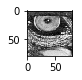

In [72]:
dpi = 96.
plt.figure(figsize=(width / dpi, height / dpi))
plt.imshow(im, cmap="Greys_r")

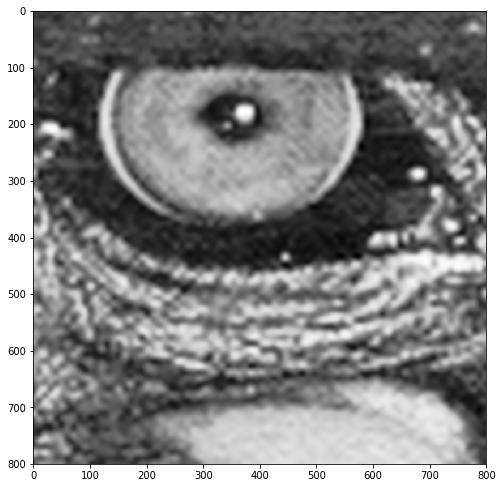

In [80]:
factor = 10
im2 = zoom(im, factor, order=3)
plt.figure(figsize=((width / dpi) * factor, (height / dpi) * factor))
plt.imshow(im2, cmap="Greys_r")

# Image rotating

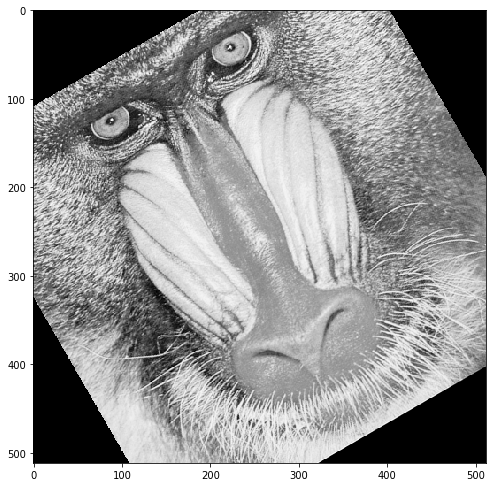

In [92]:
im = np.array(source_im)
angle = 30
im2 = rotate(im, angle, order=3, reshape=False)
plt.figure(figsize=((width / dpi) * factor, (height / dpi) * factor))
plt.imshow(im2, cmap="Greys_r")